In [8]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
# load data
df_income = pd.read_csv('data/df_income.csv')
df_education = pd.read_csv('data/df_education.csv')

In [10]:
# Explore demo data 
df_demo = pd.merge(df_income,df_education)
df_demo = df_demo[['year','district','avg_income','avg_study_year']]
df_demo.columns = ['year','district','avg_income','avg_study_year']
df_demo.head()

,year,district,avg_income,avg_study_year
0,2008,Amager Vest,209245.0,13.152245
1,2008,Amager Øst,202575.0,13.077911
2,2008,Bispebjerg,190239.0,12.846948
3,2008,Brønshøj-Husum,203281.0,12.729431
4,2008,Indre By,258185.0,14.252449


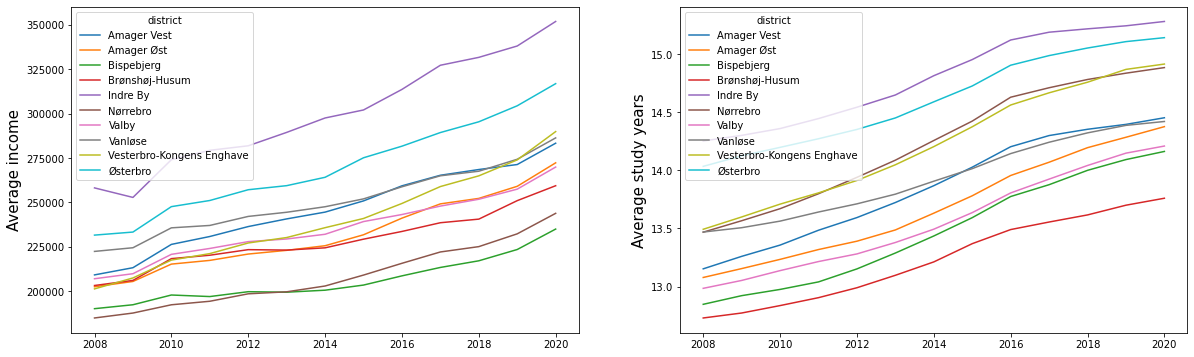

In [11]:
# Plot average income and study years over time
# MAKE BOKEH PLOT. EN FANE FOR INCOME OG EN FOR STUDY YEAR. 

table_income = pd.pivot_table(df_demo, values='avg_income', index=["year"],columns=['district'])
table_study = pd.pivot_table(df_demo, values='avg_study_year', index=["year"],columns=['district'])

# plot 
fig, axes = plt.subplots(1,2, figsize=(20,6))
table_income.plot(ax=axes[0])
axes[0].set_ylabel('Average income', fontsize=15)
axes[0].set_xlabel('')
table_study.plot(ax=axes[1])
axes[1].set_ylabel('Average study years', fontsize=15)
axes[1].set_xlabel('')
plt.show()

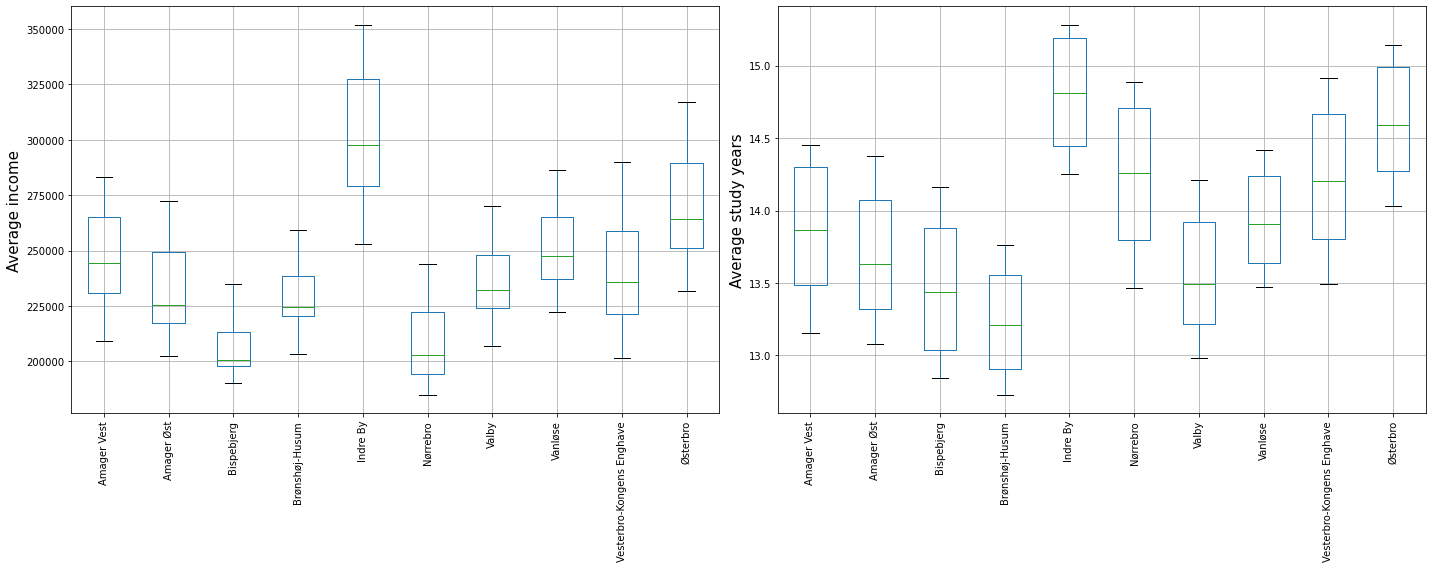

In [7]:
# Boxplot showing variation in income and study year for the period 2008-2020
districts = df_income.district.unique()
fig, axes = plt.subplots(1,2, figsize=(20,8))
table_income.boxplot(vert=True, ax=axes[0])
axes[0].set_ylabel('Average income', fontsize=15)
axes[0].set_xlabel('')
axes[0].set_xticklabels(districts,rotation=90, fontsize=10)
table_study.boxplot(vert=True, ax=axes[1])
axes[1].set_ylabel('Average study years', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_xticklabels(districts,rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
# Turkey's pairwise test to compare means 
tukey_income = pairwise_tukeyhsd(endog=df_demo['avg_income'], groups=df_demo['district'], alpha=0.05)
tukey_study = pairwise_tukeyhsd(endog=df_demo['avg_study_year'], groups=df_demo['district'], alpha=0.05)

def plot_tukey(tukey):
    plt.figure(figsize=(12,12))
    rows = tukey.summary().data[1:]
    plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
    plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
    plt.gca().set_yticks( range( len( rows ) ) )
    plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
    plt.show()

In [9]:
print(tukey_income)
#plot_tukey(tukey_income)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
          group1                    group2            meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------------------------
              Amager Vest                Amager Øst -14141.8462 0.8016 -41897.7766  13614.0843  False
              Amager Vest                Bispebjerg -40090.6923  0.001 -67846.6227 -12334.7619   True
              Amager Vest            Brønshøj-Husum    -17561.0  0.563 -45316.9304  10194.9304  False
              Amager Vest                  Indre By  53629.3846  0.001  25873.4542   81385.315   True
              Amager Vest                  Nørrebro    -37754.0  0.001 -65509.9304  -9998.0696   True
              Amager Vest                     Valby -10706.1538    0.9 -38462.0843  17049.7766  False
              Amager Vest                   Vanløse   4441.6154    0.9  -23314.315

In [10]:
print(tukey_study)
#plot_tukey(tukey_study)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
              Amager Vest                Amager Øst  -0.1702    0.9 -0.7221  0.3817  False
              Amager Vest                Bispebjerg  -0.3853 0.4317 -0.9372  0.1665  False
              Amager Vest            Brønshøj-Husum  -0.6258 0.0135 -1.1777  -0.074   True
              Amager Vest                  Indre By   0.9384  0.001  0.3865  1.4902   True
              Amager Vest                  Nørrebro   0.3756 0.4689 -0.1763  0.9274  False
              Amager Vest                     Valby   -0.297 0.7462 -0.8488  0.2549  False
              Amager Vest                   Vanløse   0.0734    0.9 -0.4785  0.6252  False
              Amager Vest Vesterbro-Kongens Enghave   0.3652 0.5067 -0.1866  0.9171  False

In [140]:
# OLS: avg_income ~ year + ditrict + year*districts 
# Different slopes model 
df_test = df_demo.copy()
df_test['year'] = df_test['year']-2008
lm = smf.ols(formula='avg_income ~ year + C(district) + year:C(district)', data = df_test)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_income   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     537.9
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.02e-99
Time:                        14:25:40   Log-Likelihood:                -1244.7
No. Observations:                 130   AIC:                             2529.
Df Residuals:                     110   BIC:                             2587.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      2.111e+05   1984.703    106.385      0.000    2.07e+05    2.15e+05
C(district)[T.Amager Øst]                     -1.137e+04   2806.794     -4.050      0.000   -1.69e+04   -5805.032
C(district)[T.Bispebjerg]                     -2.392e+04   2806.794     -8.523      0.000   -2.95e+04   -1.84e+04
C(district)[T.Brønshøj-Husum]                 -6649.2088   2806.794     -2.369      0.020   -1.22e+04   -1086.801
C(district)[T.Indre By]                        4.126e+04   2806.794     14.701      0.000    3.57e+04    4.68e+04
C(district)[T.Nørrebro]                       -3.022e+04   2806.794    -10.765      0.000   -3.58e+04   -2.47e+04
C(district)[T.Valby]                          -3719.2527   2806.794     -1.325      0.188   -9281.661    1843.155
C(district)[T.Vanløse]                         1.032e+04   2806.794      3.678      0.000    4759.603    1.59e+04
C(district)[T.Vesterbro-Kongens Enghave]      -1.146e+04   2806.794     -4.085      0.000    -1.7e+04   -5902.120
C(district)[T.Østerbro]                        1.787e+04   2806.794      6.366      0.000    1.23e+04    2.34e+04
year                                           5837.6374    280.679     20.798      0.000    5281.397    6393.878
year:C(district)[T.Amager Øst]                 -462.4011    396.941     -1.165      0.247   -1249.044     324.242
year:C(district)[T.Bispebjerg]                -2694.7802    396.941     -6.789      0.000   -3481.423   -1908.137
year:C(district)[T.Brønshøj-Husum]            -1818.6319    396.941     -4.582      0.000   -2605.275   -1031.989
year:C(district)[T.Indre By]                   2060.9011    396.941      5.192      0.000    1274.258    2847.544
year:C(district)[T.Nørrebro]                  -1256.4066    396.941     -3.165      0.002   -2043.050    -469.763
year:C(district)[T.Valby]                     -1164.4835    396.941     -2.934      0.004   -1951.127    -377.840
year:C(district)[T.Vanløse]                    -980.0659    396.941     -2.469      0.015   -1766.709    -193.423
year:C(district)[T.Vesterbro-Kongens Enghave]   870.6264    396.941      2.193      0.030      83.983    1657.270
year:C(district)[T.Østerbro]                    957.1813    396.941      2.411      0.018     170.538    1743.825
==============================================================================
Omnibus:                        5.710   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.593
Skew:                           0.508   Prob(JB):                       0.0610
Kurtosis:                       3.018   Cond. No.                         148.
==================================================================

In [142]:
lm_anova = sm.stats.anova_lm(lm_fit, typ=2) # Type 2 partitioning of variance
print(lm_anova)
## all variables are significant. 

                        sum_sq     df            F        PR(>F)
C(district)       9.031120e+10    9.0   699.852430  9.222862e-93
year              5.285190e+10    1.0  3686.107073  1.993008e-86
year:C(district)  3.382546e+09    9.0    26.212507  1.415071e-23
Residual          1.577195e+09  110.0          NaN           NaN


In [143]:
# Same model using study_year as response 
df_test = df_demo.copy()
df_test['year'] = df_test['year']-2008
lm = smf.ols(formula='avg_study_year ~ year + C(district) + year:C(district)', data = df_test)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_study_year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     876.2
Date:                Tue, 03 May 2022   Prob (F-statistic):          8.72e-111
Time:                        14:31:32   Log-Likelihood:                 201.22
No. Observations:                 130   AIC:                            -362.4
Df Residuals:                     110   BIC:                            -305.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        13.1524      0.029    448.488      0.000      13.094      13.211
C(district)[T.Amager Øst]                        -0.1547      0.041     -3.730      0.000      -0.237      -0.073
C(district)[T.Bispebjerg]                        -0.4010      0.041     -9.669      0.000      -0.483      -0.319
C(district)[T.Brønshøj-Husum]                    -0.4853      0.041    -11.701      0.000      -0.567      -0.403
C(district)[T.Indre By]                           1.0512      0.041     25.347      0.000       0.969       1.133
C(district)[T.Nørrebro]                           0.2993      0.041      7.218      0.000       0.217       0.382
C(district)[T.Valby]                             -0.2457      0.041     -5.925      0.000      -0.328      -0.164
C(district)[T.Vanløse]                            0.2513      0.041      6.059      0.000       0.169       0.333
C(district)[T.Vesterbro-Kongens Enghave]          0.3041      0.041      7.333      0.000       0.222       0.386
C(district)[T.Østerbro]                           0.8480      0.041     20.447      0.000       0.766       0.930
year                                              0.1177      0.004     28.388      0.000       0.110       0.126
year:C(district)[T.Amager Øst]                   -0.0026      0.006     -0.440      0.661      -0.014       0.009
year:C(district)[T.Bispebjerg]                    0.0026      0.006      0.445      0.657      -0.009       0.014
year:C(district)[T.Brønshøj-Husum]               -0.0234      0.006     -3.994      0.000      -0.035      -0.012
year:C(district)[T.Indre By]                     -0.0188      0.006     -3.207      0.002      -0.030      -0.007
year:C(district)[T.Nørrebro]                      0.0127      0.006      2.166      0.032       0.001       0.024
year:C(district)[T.Valby]                        -0.0085      0.006     -1.455      0.148      -0.020       0.003
year:C(district)[T.Vanløse]                      -0.0297      0.006     -5.056      0.000      -0.041      -0.018
year:C(district)[T.Vesterbro-Kongens Enghave]     0.0102      0.006      1.736      0.085      -0.001       0.022
year:C(district)[T.Østerbro]                     -0.0161      0.006     -2.741      0.007      -0.028      -0.004
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.850
Skew:                           0.121   Prob(JB):                        0.654
Kurtosis:                       2.686   Cond. No.                         148.
==================================================================

In [144]:
lm_anova = sm.stats.anova_lm(lm_fit, typ=2) # Type 2 partitioning of variance
print(lm_anova)
## all variables are significant. 

                     sum_sq     df            F         PR(>F)
C(district)       29.604978    9.0  1050.778382  2.529336e-102
year              22.172720    1.0  7082.847170  1.072988e-101
year:C(district)   0.336751    9.0    11.952391   5.652967e-13
Residual           0.344353  110.0          NaN            NaN
